In [20]:
import pandas as pd
import numpy as np

In [21]:
prod = pd.read_excel('VT8.xlsx', sheet_name = 'Productos')
boleta = pd.read_excel('VT8.xlsx', sheet_name = 'Boletas Históricas')

Queremos determinar la frecuencia que hay de boletas 2, 3, 4,...., 8, 9 y 10 productos.

In [3]:
def cantidad(p1,p2,p3,p4,p5,p6,p7,p8,p9,p10):
    productos = [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]
    i=0
    for producto in productos:
        if producto == '-':
            pass
        else:
            i+=1
    return i    

In [4]:
boleta["Cantidad"] = boleta.apply(lambda x: cantidad(x['Producto 1'],x['Producto 2'],x['Producto 3'],
                            x['Producto 4'],x['Producto 5'],x['Producto 6'],x['Producto 7'],x['Producto 8']
                            ,x['Producto 9'],x['Producto 10']),axis = 1)

In [5]:
cantidad = boleta.groupby('Cantidad')['Boleta'].count().reset_index()
cantidad

,Cantidad,Boleta
0,2,17
1,3,1464
2,4,401
3,5,484
4,6,1446
5,7,1281
6,8,903
7,9,73
8,10,30


Ahora queremos construir una matriz en la que las columnas corresponden a los productos, al igual que las filas. El valor que colocaremos en la matriz corresponde a la cantidad total de boletas en las que aparecen conjuntamente cada par de productos.

In [6]:
boleta['Producto 1'][0]

'Jugo de fruta'

In [7]:
def cant_boleta(p1,p2,boletas):
    if p1==p2:
        return 0
    else:
        uso = boletas[((boletas['Producto 1']==p1)|(boletas['Producto 2']==p1)|(boletas['Producto 3']==p1)|
        (boletas['Producto 4']==p1)|(boletas['Producto 5']==p1)|(boletas['Producto 6']==p1)|
        (boletas['Producto 7']==p1)|(boletas['Producto 8']==p1)|(boletas['Producto 9']==p1)|(boletas['Producto 10']==p1))&
        ((boletas['Producto 1']==p2)|(boletas['Producto 2']==p2)|(boletas['Producto 3']==p2)|
        (boletas['Producto 4']==p2)|(boletas['Producto 5']==p2)|(boletas['Producto 6']==p2)|(boletas['Producto 7']==p2)|
        (boletas['Producto 8']==p2)|(boletas['Producto 9']==p2)|(boletas['Producto 10']==p2))]
        return len(uso)

In [8]:
products = prod['Producto'].unique().tolist()

In [9]:
agrup_prod = prod.groupby(['Producto'])['Unnamed: 0'].count().reset_index()[['Producto']]
agrup_prod

,Producto
0,Aceite
1,Aceite de oliva
2,Acelga
3,Acondicionador / enjuague
4,Acondicionador de telas
...,...
217,Vinagre
218,Vino de mesa
219,Yoghurt
220,Zanahoria


In [10]:
for producto in products:
    agrup_prod[producto] = agrup_prod.apply(lambda x: cant_boleta(x['Producto'],producto,boleta),axis=1)

In [11]:
agrup_prod

,Producto,Aceite,Aceite de oliva,Grasa comestible,Manteca,Manteca de cerdo,Margarina,Minarina,Agua con gas,Agua sin gas,...,Detergente ropa polvo,Detergente trastes,Insecticida aerosol,Jabón de pasta,Jabón limpiador,Limpiador líquido,Limpiador lìquido piso,Servilletas de papel,Suavizante ropa,Toalla de papel
0,Aceite,0,4,4,7,4,2,2,1,4,...,4,4,0,5,2,5,4,4,1,2
1,Aceite de oliva,4,0,9,4,4,3,1,5,2,...,6,7,6,3,4,0,9,2,2,2
2,Acelga,4,4,7,0,8,2,2,1,5,...,7,6,4,7,1,3,3,5,4,0
3,Acondicionador / enjuague,2,2,3,3,10,6,1,3,0,...,4,5,3,6,2,5,5,7,6,2
4,Acondicionador de telas,1,3,2,2,3,4,3,1,3,...,2,6,4,1,2,5,5,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Vinagre,3,4,4,2,2,1,3,6,5,...,5,6,2,2,6,5,6,2,3,1
218,Vino de mesa,4,4,5,6,6,7,2,1,3,...,3,3,6,4,3,2,6,4,2,4
219,Yoghurt,6,5,5,2,2,4,2,2,5,...,5,2,4,5,5,4,1,3,2,0
220,Zanahoria,3,3,4,4,2,2,1,4,4,...,4,7,4,4,5,2,4,5,4,1


## Correlación
Finalmente, queremos determinar la correlación que existe entre el precio de los productos y el espacio que ocupan (dado por longitud X ancho)

In [12]:
prod.dtypes

Unnamed: 0      int64
Familia        object
Producto       object
Precio          int64
Largo         float64
Ancho         float64
dtype: object

In [13]:
prod.columns

Index(['Unnamed: 0', 'Familia', 'Producto', 'Precio', 'Largo', 'Ancho'], dtype='object')

In [14]:
prod.dtypes

Unnamed: 0      int64
Familia        object
Producto       object
Precio          int64
Largo         float64
Ancho         float64
dtype: object

In [15]:
prod['Espacio'] = prod['Largo']*prod['Ancho']
prod

,Unnamed: 0,Familia,Producto,Precio,Largo,Ancho,Espacio
0,0,Aceites y grasas,Aceite,6455,5.9,2.4,14.16
1,1,Aceites y grasas,Aceite de oliva,7574,10.6,4.4,46.64
2,2,Aceites y grasas,Grasa comestible,600,13.1,11.1,145.41
3,3,Aceites y grasas,Manteca,5755,12.7,7.5,95.25
4,4,Aceites y grasas,Manteca de cerdo,6419,3.4,6.3,21.42
...,...,...,...,...,...,...,...
217,217,Limpieza del hogar,Limpiador líquido,5309,9.7,12.5,121.25
218,218,Limpieza del hogar,Limpiador lìquido piso,4534,10.5,0.6,6.30
219,219,Limpieza del hogar,Servilletas de papel,4951,5.5,12.3,67.65
220,220,Limpieza del hogar,Suavizante ropa,7260,8.2,8.9,72.98


In [16]:
prod['Espacio'].corr(prod['Precio'])

-0.053912873309223605

<AxesSubplot:xlabel='Espacio', ylabel='Precio'>

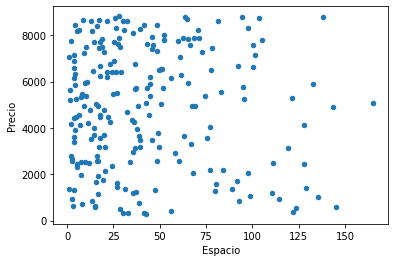

In [17]:
prod.plot(x='Espacio',y='Precio',kind = 'scatter')